# Machine Learning Project 

## Diabetic 

In [128]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Read the dataset
db_df = pd.read_csv("D:/Integrify/Dataset/Project 3/archive/diabetes_binary_health_indicators_BRFSS2015.csv")

In [44]:
db_df.head(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [45]:
# Dimension of dataset
db_df.shape

(253680, 22)

In [46]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [47]:
#Descriptive statistics of dataset
db_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [48]:
# checking missing values
db_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [49]:
# Check for dulicates
duplicates = db_df[db_df.duplicated()]

In [50]:
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [51]:
# Drop the dulicates
db_df.drop_duplicates(inplace = True)

In [52]:
db_df.shape

(229474, 22)

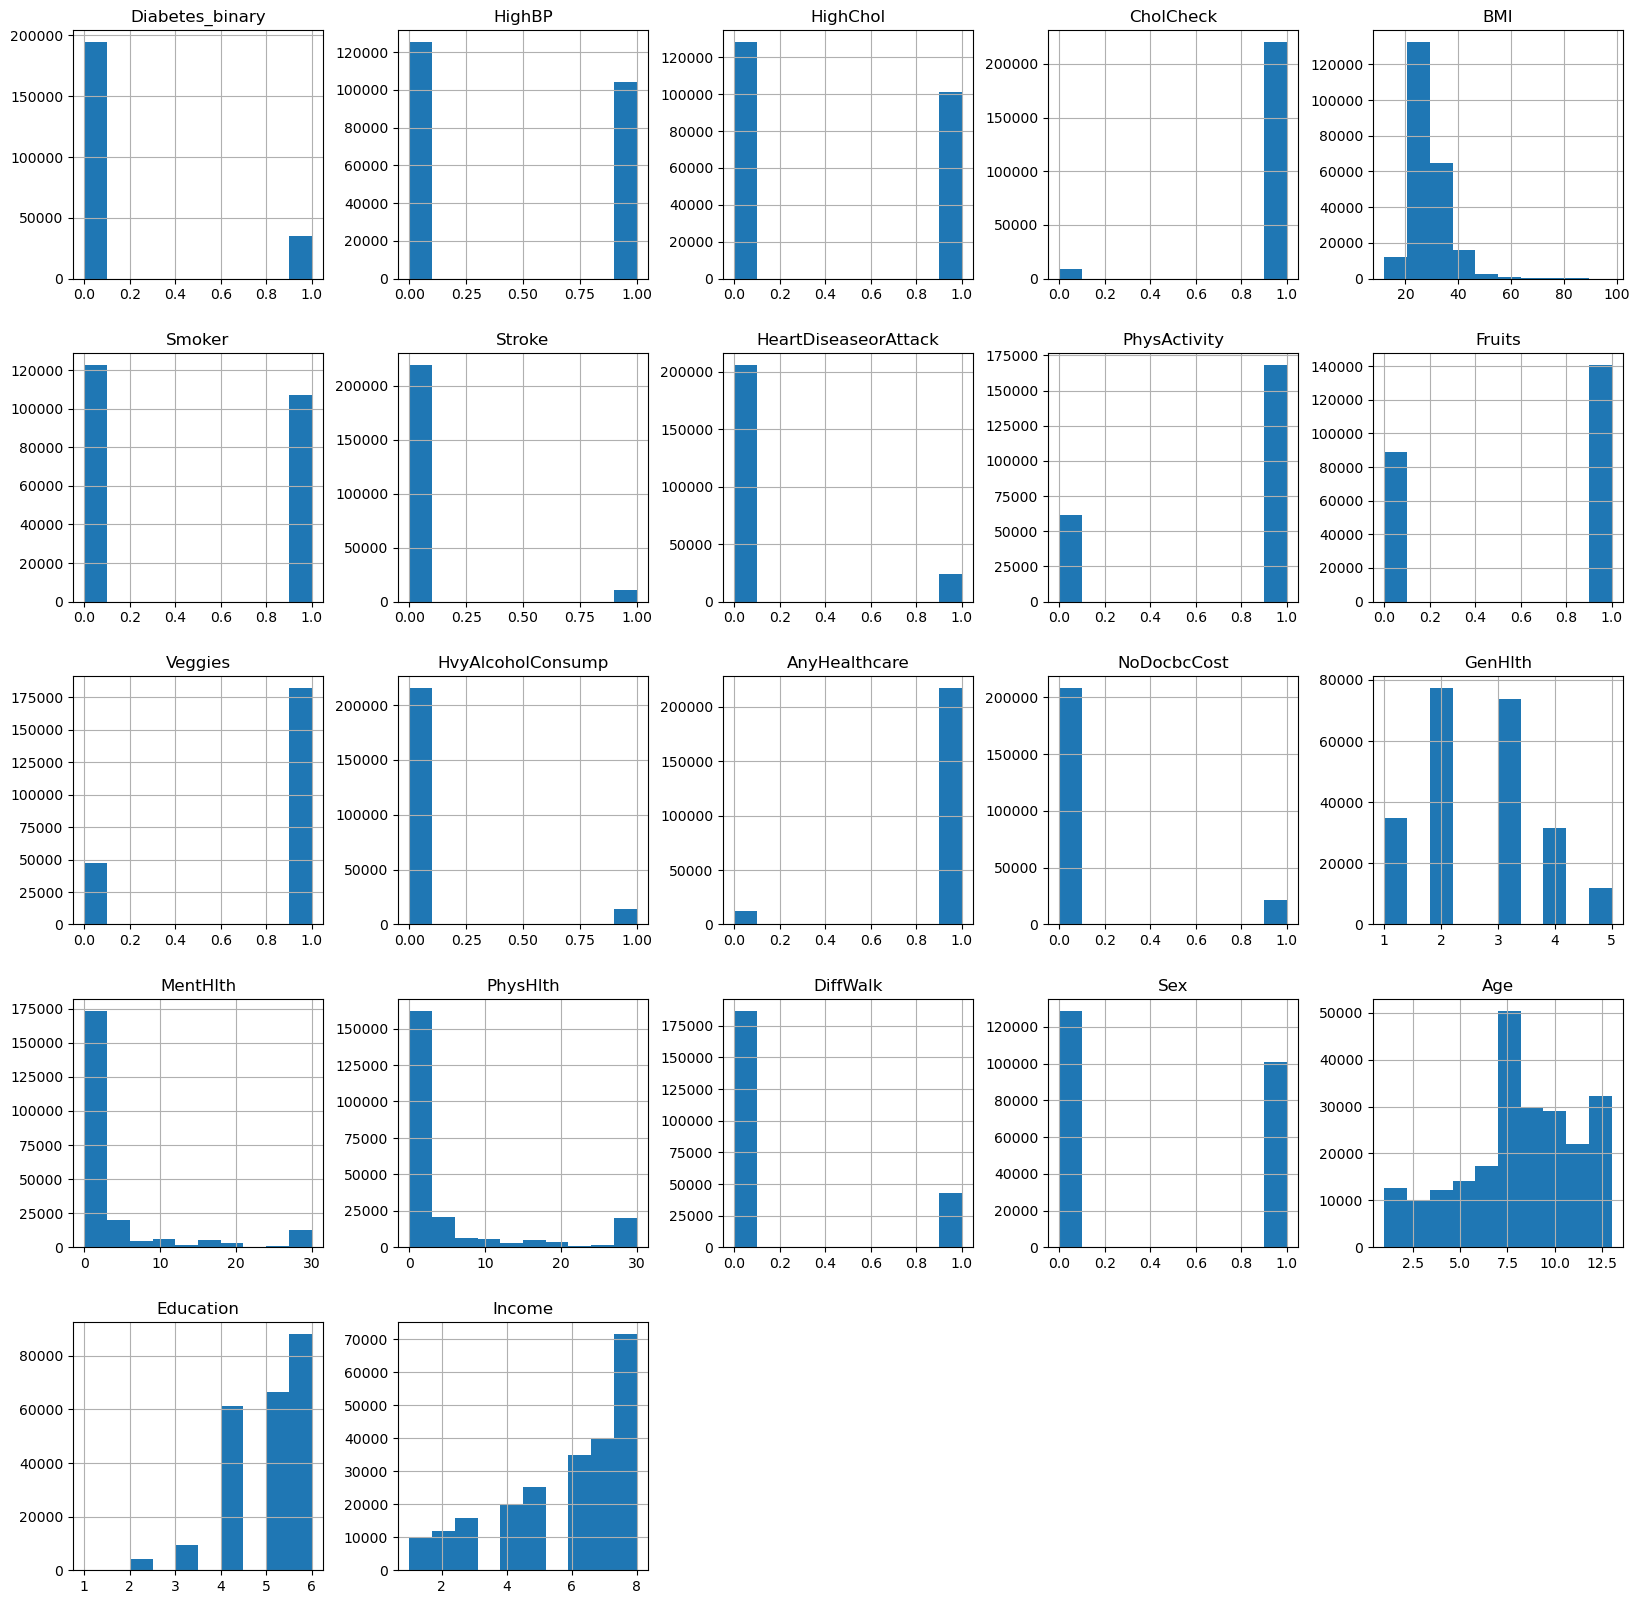

In [53]:
# #create histogram for each column in DataFrame

db_df.hist(figsize=(20,20));

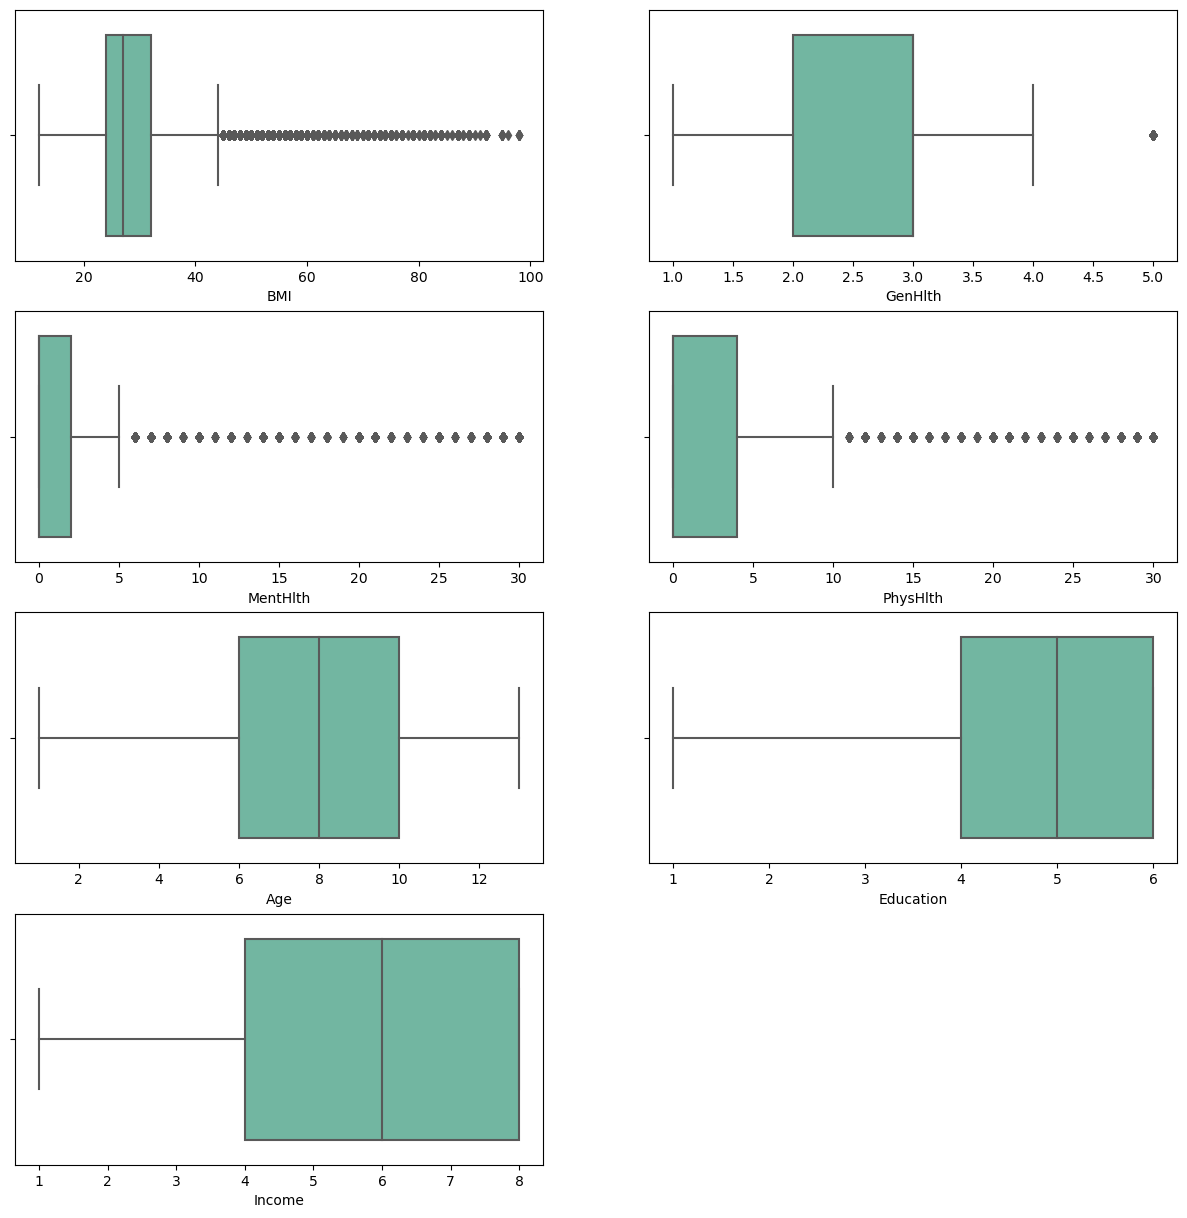

In [54]:
# Outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = db_df ,palette='Set2')
plt.show()


In [55]:
#Correlation matrix
correlation_matrix = db_df.corr()
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


<AxesSubplot: >

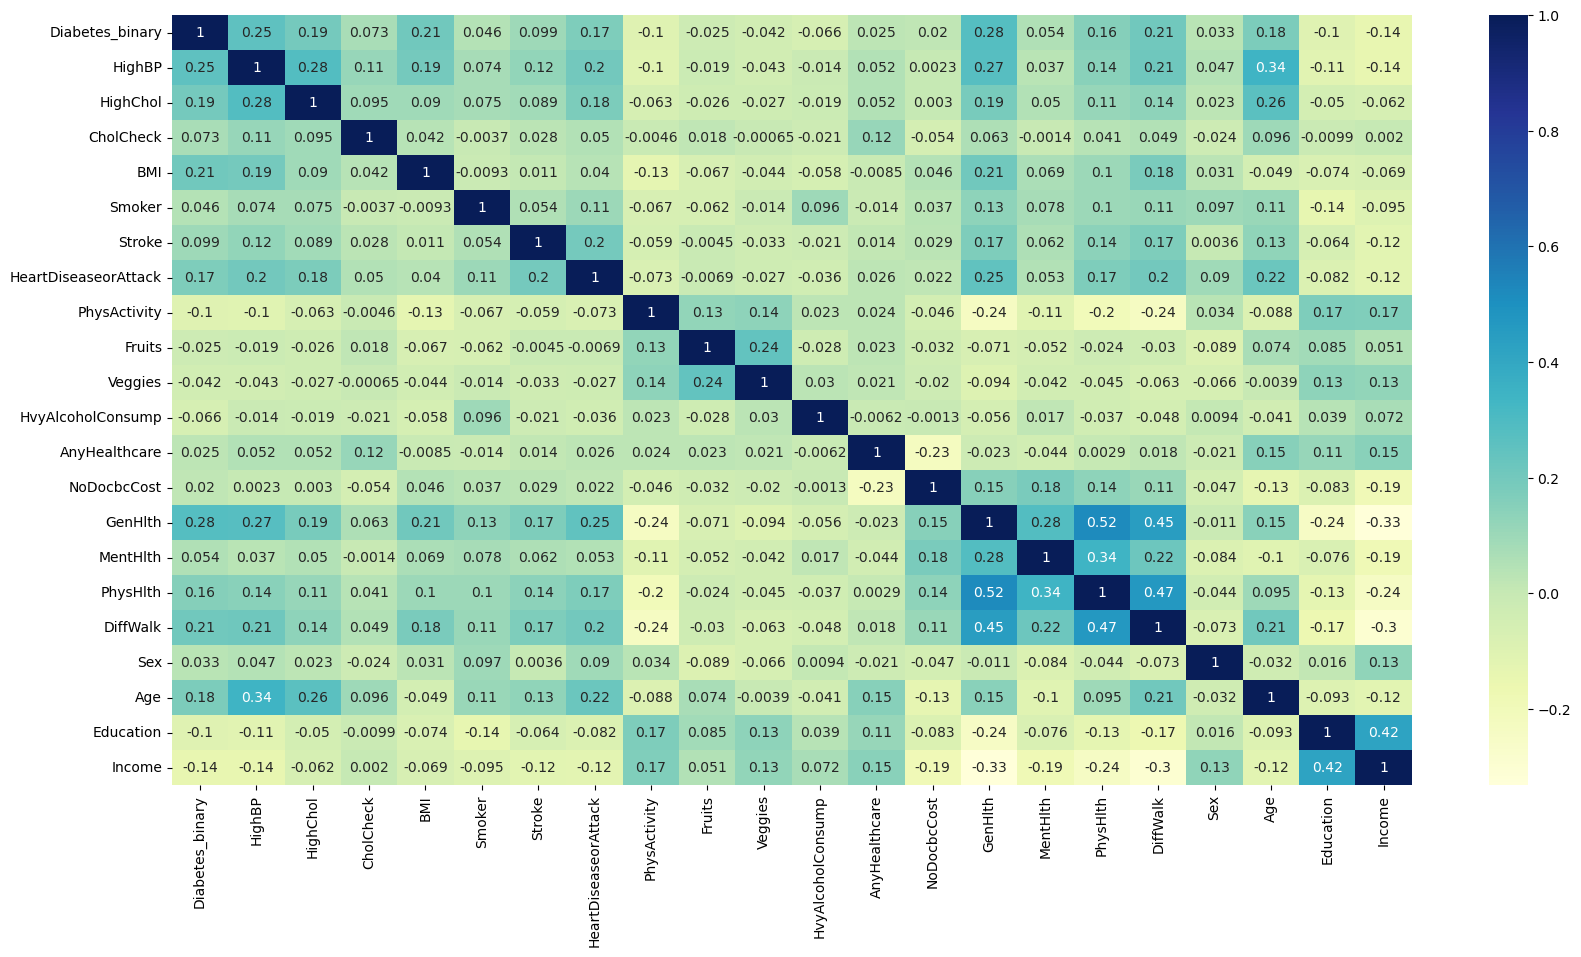

In [56]:
# Create a correlation map using a heatmap

plt.figure(figsize=(20,10))
sns.heatmap(db_df.corr(), annot=True, cmap="YlGnBu")

In [57]:
# variables that are correlated with the target variable 
db_df.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15) # use absolute value to get the absolute correlation

Diabetes_binary         1.000000
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
Name: Diabetes_binary, dtype: float64

We have large dataset, so will be working on a sample of 30000


In [58]:
db_df_sample = db_df.sample(n=30000, random_state=42)
db_df_sample


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
218137,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,10.0,0.0,0.0,10.0,6.0,8.0
234092,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
220499,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,4.0,4.0
133305,0.0,1.0,1.0,1.0,24.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,16.0,1.0,0.0,10.0,3.0,1.0
1394,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170676,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,25.0,0.0,0.0,0.0,3.0,5.0,7.0
96994,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0
13110,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
134737,0.0,0.0,0.0,1.0,48.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,5.0,7.0


In [59]:
db_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 218137 to 25884
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       30000 non-null  float64
 1   HighBP                30000 non-null  float64
 2   HighChol              30000 non-null  float64
 3   CholCheck             30000 non-null  float64
 4   BMI                   30000 non-null  float64
 5   Smoker                30000 non-null  float64
 6   Stroke                30000 non-null  float64
 7   HeartDiseaseorAttack  30000 non-null  float64
 8   PhysActivity          30000 non-null  float64
 9   Fruits                30000 non-null  float64
 10  Veggies               30000 non-null  float64
 11  HvyAlcoholConsump     30000 non-null  float64
 12  AnyHealthcare         30000 non-null  float64
 13  NoDocbcCost           30000 non-null  float64
 14  GenHlth               30000 non-null  float64
 15  MentHlth      

In [60]:
# Target variable
# view the frequency distribution of values

db_df_sample['Diabetes_binary'].value_counts()

0.0    25308
1.0     4692
Name: Diabetes_binary, dtype: int64

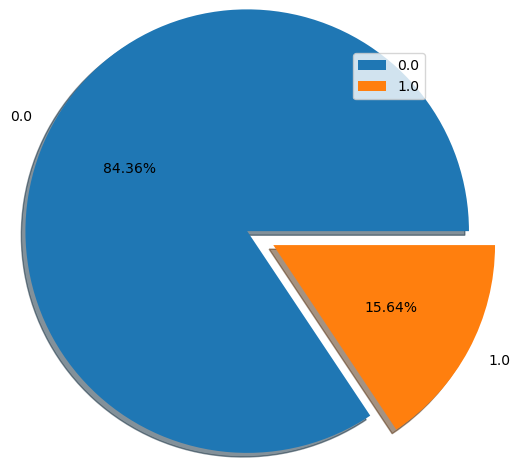

In [61]:
# Checking distrubtion of binary_distrbution Diabetes_binary
# Count the occurrences of each category
plt.pie(db_df_sample['Diabetes_binary'].value_counts()/len(db_df_sample),labels = db_df_sample["Diabetes_binary"].unique(),autopct = "%.2f%%",shadow=True,explode=(0,0.2),radius=1.5);
plt.legend()
plt.show()

Our data is Imbalanced.

Feature Importance

#Rank the features using PCA and Random forest

In [62]:
# 1.Split the data featues(X) and target(Y)
X=db_df_sample.drop("Diabetes_binary",axis=1)
y=db_df_sample["Diabetes_binary"]

# 2. Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#3. # Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled) # transformed data

# 4. Fit into random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_pca,y)

# 5. Feature importance scores and store them in a dataframe
feature_importances = rfc.feature_importances_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 6. Rank the features and sort it in  desecnding order
feature_ranking = feature_ranking.sort_values(by='Importance', ascending=False)
 
print(feature_ranking)





                 Feature  Importance
0                 HighBP    0.120380
1               HighChol    0.062238
5                 Stroke    0.052138
6   HeartDiseaseorAttack    0.049581
3                    BMI    0.046104
20                Income    0.045026
13               GenHlth    0.044792
19             Education    0.044179
10     HvyAlcoholConsump    0.043315
7           PhysActivity    0.043147
2              CholCheck    0.042605
16              DiffWalk    0.041819
4                 Smoker    0.041720
9                Veggies    0.041518
18                   Age    0.041238
17                   Sex    0.040785
15              PhysHlth    0.040607
14              MentHlth    0.040069
11         AnyHealthcare    0.039802
12           NoDocbcCost    0.039590
8                 Fruits    0.039348


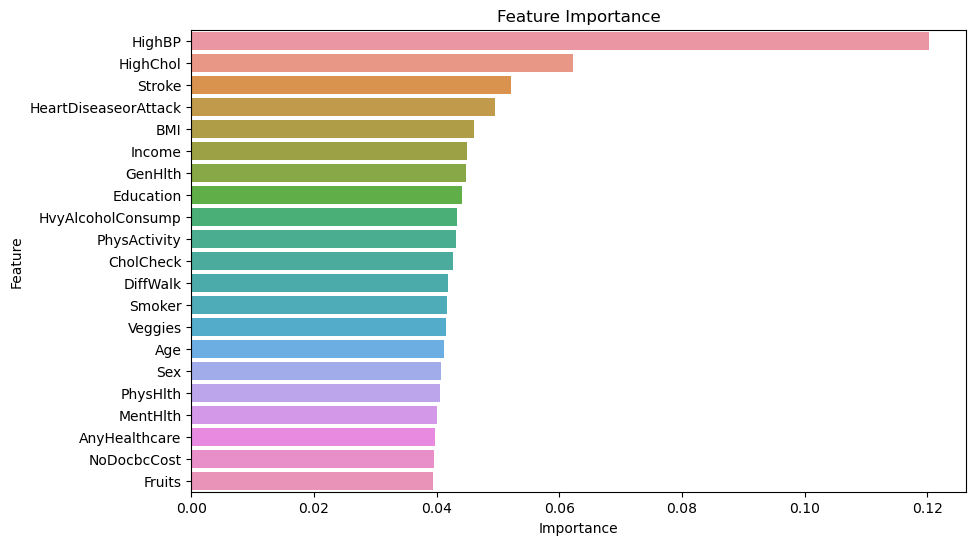

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_ranking)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [64]:
# Split to train and test set
X_train , X_test , Y_train , Y_test = train_test_split(X,y, test_size=0.2 , random_state=42)
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


Training set shape: (24000, 21) (24000,)
Testing set shape: (6000, 21) (6000,)


Balance Dataset -SMOTE

As we have seen our dataset is imbalanced , we need to balance our data to have improved model perfromance.
There are several ways in which we could balance our dataset.

In our case we will be using SMOTE oversampling technique , it will create synthetic data to the minority class.

In [65]:
# Perform SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)
print("Before Applying SMOTE:")
print("No_diabetic_0:", sum(y == 0))
print("Diabetic_1:", sum(y == 1))
print("\nAfter Applying SMOTE:")
print("No_diabetic_0:", sum(y_train_resampled == 0))
print("Diabetic_1:", sum(y_train_resampled == 1))

Before Applying SMOTE:
No_diabetic_0: 25308
Diabetic_1: 4692

After Applying SMOTE:
No_diabetic_0: 20215
Diabetic_1: 20215


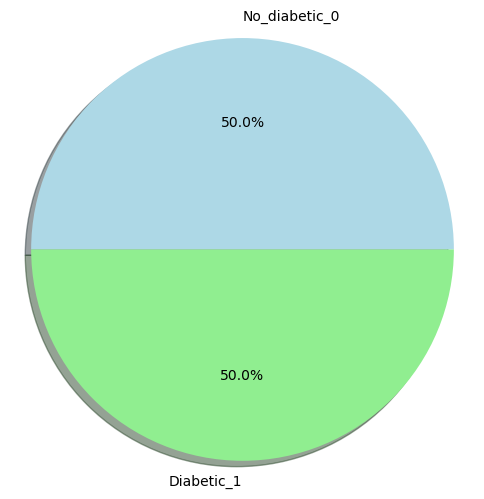

In [66]:
plt.figure(figsize=(6, 6))
explode = [0, 0] 
labels = ['No_diabetic_0', 'Diabetic_1']
sizes = y_train_resampled.value_counts()
colors = ['lightblue', 'lightgreen']  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')  
plt.show()

Models
- Logistic Regression- popular binary classification problem

- Decision Tree - Handles both binary and multi-class classification problem

- Random Forest - An ensemble method that combines multiple decision trees
 
- XGBOOST - an ensemble model which is popular one for classification and regression problem

In [67]:
# 1. Logistic Regression
model_lr = LogisticRegression(solver='liblinear', max_iter=1000)
model_lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred1 = model_lr.predict(X_test)




In [68]:
# Evaluate the model
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81      5093
         1.0       0.32      0.75      0.45       907

    accuracy                           0.72      6000
   macro avg       0.63      0.73      0.63      6000
weighted avg       0.85      0.72      0.76      6000



In [69]:
# Compute Confusion matrix 
# Create a confusion matrix
model_lr_mat = confusion_matrix(Y_test, y_pred1)
print("Confusion Matrix:")
print(model_lr_mat)

Confusion Matrix:
[[3644 1449]
 [ 229  678]]


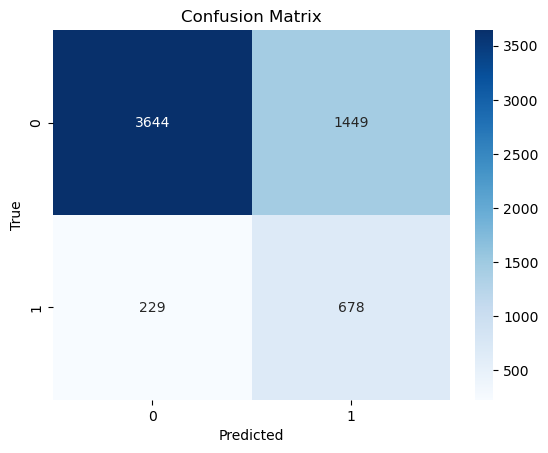

In [70]:
# Create a heatmap of the confusion matrix
sns.heatmap(model_lr_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [71]:
#2. Decision Tree
# Create a Decision Tree classifier
model2_dt = DecisionTreeClassifier()

# Train the classifier on the training data
model2_dt.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred2 = model2_dt.predict(X_test)

In [72]:
# Evaluate the model
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      5093
         1.0       0.29      0.35      0.32       907

    accuracy                           0.77      6000
   macro avg       0.58      0.60      0.59      6000
weighted avg       0.79      0.77      0.78      6000



In [73]:
# Compute Confusion matrix 
# Create a confusion matrix
model_dt_mat1 = confusion_matrix(Y_test, y_pred2)
print("Confusion Matrix:")
print(model_dt_mat1)

Confusion Matrix:
[[4321  772]
 [ 593  314]]


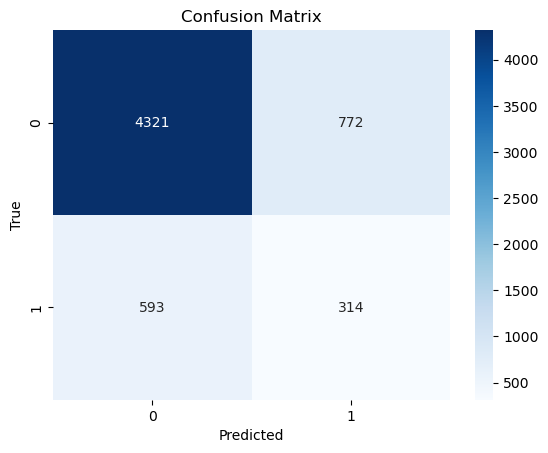

In [74]:
# Create a heatmap of the confusion matrix
sns.heatmap(model_dt_mat1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# 3. Random Forest 
model3_rf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
model3_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred3 = model3_rf.predict(X_test)


In [76]:
# Evaluate the model
print(classification_report(Y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      5093
         1.0       0.47      0.21      0.29       907

    accuracy                           0.84      6000
   macro avg       0.67      0.58      0.60      6000
weighted avg       0.81      0.84      0.82      6000



In [77]:
# Compute Confusion matrix 
# Create a confusion matrix
model_rf_mat2 = confusion_matrix(Y_test, y_pred3)
print("Confusion Matrix:")
print(model3_rf)

Confusion Matrix:
RandomForestClassifier(random_state=42)


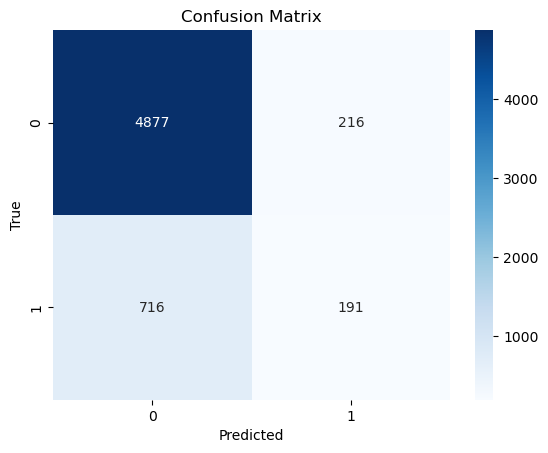

In [78]:
# Create a heatmap of the confusion matrix
sns.heatmap(model_rf_mat2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# 4.XGBOOST
model3_xgb = XGBClassifier()

# Train the XGBoost classifier
model3_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred4 = model3_xgb.predict(X_test)


In [80]:
# Evaluate the model
print(classification_report(Y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      5093
         1.0       0.50      0.21      0.29       907

    accuracy                           0.85      6000
   macro avg       0.68      0.59      0.60      6000
weighted avg       0.82      0.85      0.82      6000



In [81]:

# Calculate accuracy scores
accuracy_scores = [accuracy_score(Y_test, y_pred1),
                   accuracy_score(Y_test, y_pred2),
                   accuracy_score(Y_test, y_pred3),
                   #accuracy_score(Y_test, svm_predictions),
                   accuracy_score(Y_test, y_pred4)]

# Print accuracy scores
print("Accuracy Scores:")
print("Logistic Regression:", accuracy_scores[0])
print("Decision Tree:", accuracy_scores[1])
print("Random Forest:", accuracy_scores[2])
#print("SVM:", accuracy_scores[3])
print("XGBOOST:", accuracy_scores[3])




Accuracy Scores:
Logistic Regression: 0.7203333333333334
Decision Tree: 0.7725
Random Forest: 0.8446666666666667
XGBOOST: 0.8485


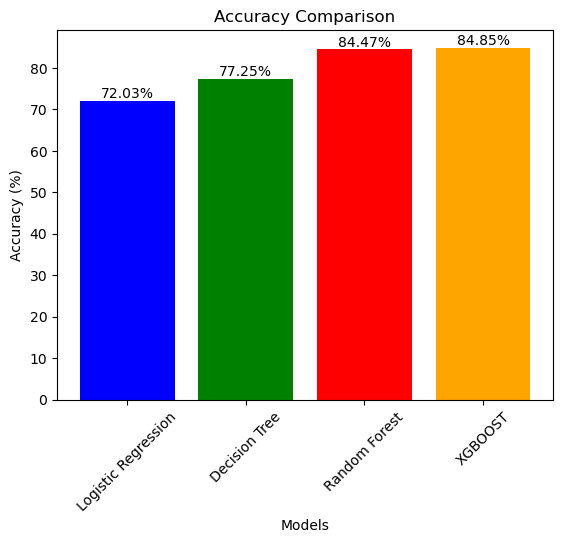

In [82]:
# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest','XGBOOST']
colors = ['blue', 'green', 'red', 'orange']
# Plot bar chart
plt.bar(models, accuracy_percentages, color=colors)

# Add percentage labels to the bars
for i, acc in enumerate(accuracy_percentages):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


# Hypertuning

GridsearchCV

In [119]:
# 1. Logistic Regression
 
model_lr_gs = LogisticRegression(solver='liblinear', max_iter=1000)
# Define the hyperparameter grid to search
lr_param_grid = {
    'C': [0.1, 1.0, 10.0]
}
# Perform grid search with cross-validation
lr_grid_search = GridSearchCV(estimator=model_lr_gs, param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Hyperparameters:", lr_grid_search.best_params_)
best_model = lr_grid_search.best_estimator_

# Make predictions on the test data using the best model
y_predrf = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_result1 = accuracy_score(Y_test, y_predrf)
print(" Accuracy:", accuracy_result1)


Best Hyperparameters: {'C': 1.0}
 Accuracy: 0.7203333333333334


In [120]:
# 2. Random Forest
model_dt_rf = RandomForestClassifier(random_state=42)
# Define the hyperparameter grid to search
rf_param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 5]
}
# grid search with cross-validation
rf_grid_search = GridSearchCV(model_dt_rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters: ", rf_grid_search.best_params_)
best_model = rf_grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_result2 = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", accuracy_result2)




Best parameters:  {'max_depth': None, 'n_estimators': 500}
Accuracy: 0.8461666666666666


In [121]:
# 3. Decision Tree Classifier
model_dt_gs = DecisionTreeClassifier(random_state=42)
# Define the hyperparameter grid to search
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# grid search with cross-validation
dt_grid_search = GridSearchCV(model_dt_gs, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters: ", dt_grid_search.best_params_)
best_model = dt_grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_dt = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_result3 = accuracy_score(Y_test, y_pred_dt)
print("Accuracy3:", accuracy_result3)





Best parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy3: 0.8091666666666667


In [122]:
#4.  #XGBOOST
model4_xgb_gs = xgb.XGBClassifier()
# hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [3, 6, 9], 
    'learning_rate': [0.1, 0.01, 0.001],  
    'n_estimators': [100, 500, 1000],  
}

# Perform grid search with cross-validation
xgb.grid_search = GridSearchCV(estimator=model4_xgb_gs, param_grid=xgb_param_grid, cv=5)
xgb.grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Hyperparameters:", xgb.grid_search.best_params_)

# Evaluate the best model on the test set
best_model = xgb.grid_search.best_estimator_
accuracy_result4 = best_model.score(X_test, Y_test)
print("Accuracy:", accuracy_result4)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Accuracy: 0.8526666666666667


In [129]:
# Best model 
model_df = pd.DataFrame(columns=['Model','Accuracy'])
model_df = model_df.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_result1}, ignore_index=True)
model_df = model_df.append({'Model': 'Decision Tree', 'Accuracy': accuracy_result2}, ignore_index=True)
model_df = model_df.append({'Model': 'Random Forest', 'Accuracy': accuracy_result3}, ignore_index=True)
model_df = model_df.append({'Model': 'XGBOOST', 'Accuracy': accuracy_result4}, ignore_index=True)







In [130]:
model_df.sort_values('Accuracy',ascending=False)

,Model,Accuracy
3,XGBOOST,0.852667
1,Decision Tree,0.846167
2,Random Forest,0.809167
0,Logistic Regression,0.720333


XGBOOST performed well even after the Hypertuning.